# Lab 2

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber 11, generar un reporte acerca de sus características principales y seleccionar las partes de dicho contenido que podrían ser relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones y estadísticas descriptivas.
* Proponer un modelo que busque relacionar las variables de interés con el desempeño de los estudiantes y concluir acerca de los posibles hallazgos que se podrían reportar para el stakeholder.
* Generar una herramienta que permita a un usuario interactuar con alguno de los parámetros del análisis realizado de forma relevante en el contexto del problema.

## Fase 1

En esta fase te harás una idea general del contenido de los datos y generarás un reporte al respecto (ej., imprimiendo mensajes, presentando tablas de resumen, etc.). Además, seleccionarás un segmento de los datos que consideres útil para realizar tu análisis.

Pautas generales:

* Utilizar una librería especializada para leer los archivos de datos y agregarlos según sea necesario (ej., utilizando los métodos append o concat si eliges cargarlos utilizando la librería pandas).
* Inspeccionar el archivo a partir de sus encabezados, columnas y descripciones de las variables según su tipo (ej., numéricas, categóricas).
* Declarar una estructura de datos (ej., una lista) para almacenar un subconjunto de variables que puedan ser relevantes para la problemática de interés.

Preguntas guía:

* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Qué planteas para manejarlos?

In [1]:
import pandas as pd
from sodapy import Socrata
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime #Para manipular fechas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Si también quieres mostrar todas las filas:
pd.set_option('display.max_rows', None)

pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
client = Socrata("www.datos.gov.co", None)
results = client.get("kgxf-xxbe", limit=50000)#, where="periodo = '20192'")
results_df = pd.DataFrame.from_records(results)

In [3]:
import numpy as np
vu=results_df['periodo'].unique()

vu = results_df['periodo'].unique()
vu_sorted = np.sort(vu.astype(int))
print(vu_sorted)

[20101 20102 20111 20112 20121 20122 20131 20132 20141 20142 20151 20152
 20161 20162 20171 20172 20181 20191 20194 20201 20211 20224]


In [4]:
from sodapy import Socrata
import pandas as pd
import time

# Con App Token si lo tienes (muy recomendable)
# client = Socrata("www.datos.gov.co", "TU_APP_TOKEN", timeout=60)

#  Sin token, riesgo de throttling
client = Socrata("www.datos.gov.co", None, timeout=60)

dataset_id = "kgxf-xxbe"
limit = 50000   # máximo permitido en SODA 2.0

def fetch_periodo(periodo):
    offset = 0
    rows = []
    while True:
        try:
            batch = client.get(
                dataset_id,
                where=f"periodo='{periodo}'",
                limit=limit,
                offset=offset
            )
        except Exception as e:
            print(f"Error con offset={offset}: {e}, reintentando...")
            time.sleep(10)
            continue

        if not batch:  # ya no hay más datos
            break

        rows.extend(batch)
        offset += limit
        print(f"   Descargadas {len(rows)} filas de {periodo}...")

        # evitar ban por exceso de peticiones
        time.sleep(0.2)

    return pd.DataFrame.from_records(rows)


El periodo 20224 tiene suficientes registros para empezar a explorar (1.065.88 de filas), sin embargo, se mostrará la lectura de otros periodos y su concatenación

In [5]:
df_20224 = fetch_periodo("20224")
print(df_20224.shape)

   Descargadas 50000 filas de 20224...
   Descargadas 100000 filas de 20224...
   Descargadas 150000 filas de 20224...
   Descargadas 200000 filas de 20224...
   Descargadas 250000 filas de 20224...
   Descargadas 300000 filas de 20224...
   Descargadas 350000 filas de 20224...
   Descargadas 400000 filas de 20224...
   Descargadas 450000 filas de 20224...
   Descargadas 500000 filas de 20224...
   Descargadas 550000 filas de 20224...
   Descargadas 600000 filas de 20224...
   Descargadas 650000 filas de 20224...
   Descargadas 700000 filas de 20224...
   Descargadas 750000 filas de 20224...
   Descargadas 800000 filas de 20224...
   Descargadas 850000 filas de 20224...
   Descargadas 900000 filas de 20224...
   Descargadas 950000 filas de 20224...
   Descargadas 1000000 filas de 20224...
   Descargadas 1050000 filas de 20224...
   Descargadas 1065888 filas de 20224...
(1065888, 51)


In [6]:
df_20211 = fetch_periodo("20211")
df_20201 = fetch_periodo("20201")
df_20191 = fetch_periodo("20191")
df_20211.shape, df_20201.shape, df_20191.shape

   Descargadas 15528 filas de 20211...
   Descargadas 15435 filas de 20201...
   Descargadas 12561 filas de 20191...


((15528, 51), (15435, 51), (12561, 51))

In [7]:
other_data = pd.concat([df_20211, df_20201, df_20191], ignore_index=True)
other_data.shape

(43524, 51)

In [8]:
other_data.head()

,periodo,estu_tipodocumento,estu_consecutivo,cole_area_ubicacion,cole_bilingue,cole_calendario,cole_caracter,cole_cod_dane_establecimiento,cole_cod_dane_sede,cole_cod_depto_ubicacion,cole_cod_mcpio_ubicacion,cole_codigo_icfes,cole_depto_ubicacion,cole_genero,cole_jornada,cole_mcpio_ubicacion,cole_naturaleza,cole_nombre_establecimiento,cole_nombre_sede,cole_sede_principal,estu_cod_depto_presentacion,estu_cod_mcpio_presentacion,estu_cod_reside_depto,estu_cod_reside_mcpio,estu_depto_presentacion,estu_depto_reside,estu_estadoinvestigacion,estu_estudiante,estu_fechanacimiento,estu_genero,estu_mcpio_presentacion,estu_mcpio_reside,estu_nacionalidad,estu_pais_reside,estu_privado_libertad,fami_cuartoshogar,fami_educacionmadre,fami_educacionpadre,fami_estratovivienda,fami_personashogar,fami_tieneautomovil,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,desemp_ingles,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
0,20211,TI,SB11202110001547,RURAL,S,B,ACADÉMICO,425758800009,425758800009,25,25758,043562,CUNDINAMARCA,MIXTO,COMPLETA,SOPÓ,NO OFICIAL,COL CAMPOALEGRE LTDA,COLEGIO CAMPOALEGRE,S,25,25899,25,25175,CUNDINAMARCA,CUNDINAMARCA,PUBLICAR,ESTUDIANTE,29/08/2002,M,ZIPAQUIRÁ,CHÍA,COLOMBIA,COLOMBIA,N,Tres,Educación profesional completa,Postgrado,Estrato 4,3 a 4,Si,Si,Si,Si,B+,83,74,64,61,69,341
1,20211,CR,SB11202110021004,URBANO,NaN,A,ACADÉMICO,425799000637,425799000637,25,25799,136754,CUNDINAMARCA,MIXTO,MAÑANA,TENJO,NO OFICIAL,COLEGIO CAMPESTRE PRINCIPADO DE MONACO,COLEGIO CAMPESTRE PRINCIPADO DE MONACO - SEDE ...,S,25,25269,25,25214,CUNDINAMARCA,CUNDINAMARCA,PUBLICAR,ESTUDIANTE,01/07/2003,M,FACATATIVÁ,COTA,COLOMBIA,COLOMBIA,N,Tres,Educación profesional completa,Educación profesional completa,Estrato 5,1 a 2,Si,Si,Si,Si,A2,66,59,60,56,66,303
2,20211,TI,SB11202110002427,URBANO,S,B,ACADÉMICO,447001004284,447001004284,47,47001,053363,MAGDALENA,MIXTO,COMPLETA,SANTA MARTA,NO OFICIAL,COLEGIO BILINGUE SANTA MARTA,COL. BILINGUE SANTA MARTA,S,47,47001,47,47001,MAGDALENA,MAGDALENA,PUBLICAR,ESTUDIANTE,21/06/2003,M,SANTA MARTA,SANTA MARTA,COLOMBIA,COLOMBIA,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B+,87,80,74,62,69,362
3,20211,TI,SB11202110002880,URBANO,N,B,TÉCNICO/ACADÉMICO,376001021583,376001021583,76,76001,066522,VALLE,MIXTO,MAÑANA,CALI,NO OFICIAL,INSTITUTO TECNICO LA RIVIERA,INSTITUTO TECNICO LA RIVIERA,S,76,76001,76,76001,VALLE,VALLE,PUBLICAR,ESTUDIANTE,17/10/2004,F,CALI,CALI,COLOMBIA,COLOMBIA,N,Tres,Educación profesional completa,Educación profesional completa,Estrato 3,3 a 4,Si,Si,Si,Si,B1,70,69,63,71,70,342
4,20211,TI,SB11202110022054,URBANO,S,B,ACADÉMICO,311769003474,311769003474,11,11001,019349,BOGOTÁ,MIXTO,COMPLETA,BOGOTÁ D.C.,NO OFICIAL,COL ANDINO,COL ANDINO,S,11,11001,11,11001,BOGOTÁ,BOGOTÁ,PUBLICAR,ESTUDIANTE,19/03/2003,M,BOGOTÁ D.C.,BOGOTÁ D.C.,COLOMBIA,COLOMBIA,N,Dos,Postgrado,Postgrado,Estrato 6,1 a 2,Si,Si,Si,Si,B+,89,65,74,65,71,352


In [9]:
data = df_20224.copy()

In [10]:
data.head(5)

,periodo,estu_tipodocumento,estu_consecutivo,cole_area_ubicacion,cole_bilingue,cole_calendario,cole_caracter,cole_cod_dane_establecimiento,cole_cod_dane_sede,cole_cod_depto_ubicacion,cole_cod_mcpio_ubicacion,cole_codigo_icfes,cole_depto_ubicacion,cole_genero,cole_jornada,cole_mcpio_ubicacion,cole_naturaleza,cole_nombre_establecimiento,cole_nombre_sede,cole_sede_principal,estu_cod_depto_presentacion,estu_cod_mcpio_presentacion,estu_cod_reside_depto,estu_cod_reside_mcpio,estu_depto_presentacion,estu_depto_reside,estu_estadoinvestigacion,estu_estudiante,estu_fechanacimiento,estu_genero,estu_mcpio_presentacion,estu_mcpio_reside,estu_nacionalidad,estu_pais_reside,estu_privado_libertad,fami_cuartoshogar,fami_educacionmadre,fami_educacionpadre,fami_estratovivienda,fami_personashogar,fami_tieneautomovil,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,desemp_ingles,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
0,20224,TI,SB11202240536228,URBANO,N,A,TÉCNICO/ACADÉMICO,183247000272,183247000272,18,18247,671586,CAQUETA,MIXTO,UNICA,EL DONCELLO,OFICIAL,I.E JORGE ABEL MOLINA,JORGE ABEL MOLINA,S,18,18247,18,18247,CAQUETA,CAQUETA,PUBLICAR,ESTUDIANTE,14/02/2004,F,EL DONCELLO,EL DONCELLO,COLOMBIA,COLOMBIA,N,Cuatro,Primaria incompleta,Primaria incompleta,Estrato 2,5 a 6,No,No,No,Si,A2,60,44,50,41,50,237
1,20224,TI,SB11202240549969,URBANO,N,A,TÉCNICO/ACADÉMICO,163001002496,163001002496,63,63001,088468,QUINDIO,MIXTO,MAÑANA,ARMENIA,OFICIAL,INSTITUCION EDUCATIVA CIUDAD DORADA,CIUDAD DORADA,S,63,63001,63,63001,QUINDIO,QUINDIO,PUBLICAR,ESTUDIANTE,14/07/2005,F,ARMENIA,ARMENIA,COLOMBIA,COLOMBIA,N,Dos,Educación profesional completa,No Aplica,Estrato 2,3 a 4,No,No,Si,Si,A-,44,42,46,43,40,214
2,20224,TI,SB11202240101947,RURAL,NaN,A,NO APLICA,205034000329,205034001457,05,05034,718171,ANTIOQUIA,MIXTO,COMPLETA,ANDES,OFICIAL,C. E. R. SANTA INES,C. E. R. SANTA RITA N° 2,N,05,05034,05,05034,ANTIOQUIA,ANTIOQUIA,PUBLICAR,ESTUDIANTE,09/05/2005,M,ANDES,ANDES,COLOMBIA,COLOMBIA,N,Dos,Primaria incompleta,Primaria incompleta,Estrato 2,3 a 4,No,No,No,No,A1,50,58,52,55,59,278
3,20224,TI,SB11202240372907,URBANO,N,A,ACADÉMICO,305088002615,305088002615,05,05088,086025,ANTIOQUIA,MIXTO,COMPLETA,BELLO,NO OFICIAL,COL NAZARET,COL NAZARET,S,05,05088,05,05088,ANTIOQUIA,ANTIOQUIA,PUBLICAR,ESTUDIANTE,29/10/2005,F,BELLO,BELLO,COLOMBIA,COLOMBIA,N,Tres,Educación profesional completa,No sabe,Estrato 3,3 a 4,Si,Si,Si,Si,A1,57,53,47,54,47,254
4,20224,TI,SB11202240270324,URBANO,N,A,ACADÉMICO,476520007282,476520007282,76,76520,702639,VALLE,MIXTO,MAÑANA,PALMIRA,NO OFICIAL,COLEGIO CIUDAD DEL CAMPO,COLEGIO CIUDAD DEL CAMPO - SEDE PRINCIPAL,S,76,76001,76,76001,VALLE,VALLE,PUBLICAR,ESTUDIANTE,04/11/2005,M,CALI,CALI,COLOMBIA,COLOMBIA,N,Tres,Técnica o tecnológica completa,No sabe,Estrato 2,3 a 4,No,Si,Si,Si,A2,64,71,68,66,69,341


In [11]:
data.tail()

,periodo,estu_tipodocumento,estu_consecutivo,cole_area_ubicacion,cole_bilingue,cole_calendario,cole_caracter,cole_cod_dane_establecimiento,cole_cod_dane_sede,cole_cod_depto_ubicacion,cole_cod_mcpio_ubicacion,cole_codigo_icfes,cole_depto_ubicacion,cole_genero,cole_jornada,cole_mcpio_ubicacion,cole_naturaleza,cole_nombre_establecimiento,cole_nombre_sede,cole_sede_principal,estu_cod_depto_presentacion,estu_cod_mcpio_presentacion,estu_cod_reside_depto,estu_cod_reside_mcpio,estu_depto_presentacion,estu_depto_reside,estu_estadoinvestigacion,estu_estudiante,estu_fechanacimiento,estu_genero,estu_mcpio_presentacion,estu_mcpio_reside,estu_nacionalidad,estu_pais_reside,estu_privado_libertad,fami_cuartoshogar,fami_educacionmadre,fami_educacionpadre,fami_estratovivienda,fami_personashogar,fami_tieneautomovil,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,desemp_ingles,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
1065883,20224,TI,SB11202240161109,URBANO,N,A,ACADÉMICO,176109000834,176109000834,76,76109,018010,VALLE,FEMENINO,MAÑANA,BUENAVENTURA,OFICIAL,SAN VICENTE,COLEGIO SAN VICENTE,S,76,76109,76,76109,VALLE,VALLE,PUBLICAR,ESTUDIANTE,14/09/2006,F,BUENAVENTURA,BUENAVENTURA,COLOMBIA,COLOMBIA,N,Dos,Secundaria (Bachillerato) completa,Primaria incompleta,Estrato 1,1 a 2,No,Si,Si,Si,A-,33,46,29,49,36,197
1065884,20224,TI,SB11202240249638,URBANO,N,A,TÉCNICO,168276000720,168276000720,68,68276,038638,SANTANDER,MIXTO,TARDE,FLORIDABLANCA,OFICIAL,COL TEC VICENTE AZUERO,COL TEC VICENTE AZUERO,S,68,68276,68,68276,SANTANDER,SANTANDER,PUBLICAR,ESTUDIANTE,16/06/2004,M,FLORIDABLANCA,FLORIDABLANCA,COLOMBIA,COLOMBIA,N,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Estrato 1,3 a 4,No,Si,Si,Si,A1,51,64,52,60,58,290
1065885,20224,CC,SB11202240551456,URBANO,N,A,ACADÉMICO,105212000163,105212000163,05,05212,120261,ANTIOQUIA,MIXTO,NOCHE,COPACABANA,OFICIAL,INSTITUCION EDUCATIVA JOSE MIGUEL DE RESTREPO ...,COLEGIO JOSE MIGUEL DE RESTREPO Y PUERTA,S,05,05212,05,05212,ANTIOQUIA,ANTIOQUIA,PUBLICAR,ESTUDIANTE,23/05/2002,F,COPACABANA,COPACABANA,COLOMBIA,COLOMBIA,N,Cuatro,Secundaria (Bachillerato) incompleta,Primaria incompleta,Estrato 2,5 a 6,No,No,Si,Si,A-,28,38,40,38,47,199
1065886,20224,TI,SB11202240534553,URBANO,N,A,TÉCNICO/ACADÉMICO,341013000010,341013000010,41,41013,615914,HUILA,MIXTO,UNICA,AGRADO,OFICIAL,INSTITUCION EDUCATIVA LA MERCED,LA MERCED,S,41,41298,41,41013,HUILA,HUILA,PUBLICAR,ESTUDIANTE,04/01/2005,M,GARZÓN,AGRADO,COLOMBIA,COLOMBIA,N,Cuatro,Técnica o tecnológica completa,Educación profesional completa,Estrato 1,3 a 4,Si,Si,Si,Si,A1,52,52,40,51,49,242
1065887,20224,TI,SB11202240014003,URBANO,N,A,TÉCNICO/ACADÉMICO,315176000016,315176000016,15,15176,004960,BOYACA,MIXTO,MAÑANA,CHIQUINQUIRÁ,OFICIAL,I.E. TECNICO COMERCIAL SAGRADO CORAZON DE JESUS,I.E.T. COMERCIAL SAGRADO CORAZON DE JESÚS - SE...,S,15,15176,15,15176,BOYACA,BOYACA,PUBLICAR,ESTUDIANTE,05/06/2005,F,CHIQUINQUIRÁ,CHIQUINQUIRÁ,COLOMBIA,COLOMBIA,N,NaN,Educación profesional completa,Educación profesional completa,Estrato 4,5 a 6,No,Si,Si,Si,A-,33,57,39,47,48,233


In [12]:
print(data.columns)
print(data.info())

Index(['periodo', 'estu_tipodocumento', 'estu_consecutivo',
       'cole_area_ubicacion', 'cole_bilingue', 'cole_calendario',
       'cole_caracter', 'cole_cod_dane_establecimiento', 'cole_cod_dane_sede',
       'cole_cod_depto_ubicacion', 'cole_cod_mcpio_ubicacion',
       'cole_codigo_icfes', 'cole_depto_ubicacion', 'cole_genero',
       'cole_jornada', 'cole_mcpio_ubicacion', 'cole_naturaleza',
       'cole_nombre_establecimiento', 'cole_nombre_sede',
       'cole_sede_principal', 'estu_cod_depto_presentacion',
       'estu_cod_mcpio_presentacion', 'estu_cod_reside_depto',
       'estu_cod_reside_mcpio', 'estu_depto_presentacion', 'estu_depto_reside',
       'estu_estadoinvestigacion', 'estu_estudiante', 'estu_fechanacimiento',
       'estu_genero', 'estu_mcpio_presentacion', 'estu_mcpio_reside',
       'estu_nacionalidad', 'estu_pais_reside', 'estu_privado_libertad',
       'fami_cuartoshogar', 'fami_educacionmadre', 'fami_educacionpadre',
       'fami_estratovivienda', 'fami_perso

Descripción de columnas: https://www.datos.gov.co/Educaci-n/Resultados-nicos-Saber-11/kgxf-xxbe/about_data

In [13]:
#convirtiendo algunas columnas de texto a númericas
data['punt_matematicas'] = pd.to_numeric(data['punt_matematicas'], errors="coerce")
data['punt_sociales_ciudadanas'] = pd.to_numeric(data['punt_sociales_ciudadanas'], errors="coerce")
data['punt_c_naturales'] = pd.to_numeric(data['punt_c_naturales'], errors="coerce")
data['punt_lectura_critica'] = pd.to_numeric(data['punt_lectura_critica'], errors="coerce")
data['punt_global'] = pd.to_numeric(data['punt_global'], errors="coerce")

In [14]:
data.dtypes

periodo                          object
estu_tipodocumento               object
estu_consecutivo                 object
cole_area_ubicacion              object
cole_bilingue                    object
cole_calendario                  object
cole_caracter                    object
cole_cod_dane_establecimiento    object
cole_cod_dane_sede               object
cole_cod_depto_ubicacion         object
cole_cod_mcpio_ubicacion         object
cole_codigo_icfes                object
cole_depto_ubicacion             object
cole_genero                      object
cole_jornada                     object
cole_mcpio_ubicacion             object
cole_naturaleza                  object
cole_nombre_establecimiento      object
cole_nombre_sede                 object
cole_sede_principal              object
estu_cod_depto_presentacion      object
estu_cod_mcpio_presentacion      object
estu_cod_reside_depto            object
estu_cod_reside_mcpio            object
estu_depto_presentacion          object


In [15]:
data.describe()

,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
count,1065888.00,1065888.00,1065888.00,1065888.00,1065888.00
mean,50.59,47.70,49.08,52.80,250.14
std,12.23,11.92,10.38,10.77,51.84
min,0.00,0.00,0.00,0.00,0.00
25%,42.00,38.00,41.00,45.00,210.00
50%,51.00,47.00,48.00,53.00,247.00
75%,59.00,57.00,56.00,61.00,288.00
max,100.00,100.00,100.00,100.00,477.00


In [16]:
# Lista de columnas que nos interesan
cols = [
    'periodo', 'estu_tipodocumento', 'estu_consecutivo',
    'cole_area_ubicacion', 'cole_bilingue', 'cole_calendario',
    'cole_caracter', 'cole_cod_dane_establecimiento', 'cole_cod_dane_sede',
    'cole_cod_depto_ubicacion', 'cole_cod_mcpio_ubicacion',
    'cole_codigo_icfes', 'cole_depto_ubicacion', 'cole_genero',
    'cole_jornada', 'cole_mcpio_ubicacion', 'cole_naturaleza',
    'cole_nombre_establecimiento', 'cole_nombre_sede',
    'cole_sede_principal', 'estu_cod_depto_presentacion',
    'estu_cod_mcpio_presentacion', 'estu_cod_reside_depto',
    'estu_cod_reside_mcpio', 'estu_depto_presentacion', 'estu_depto_reside',
    'estu_estadoinvestigacion', 'estu_estudiante', 'estu_fechanacimiento',
    'estu_genero', 'estu_mcpio_presentacion', 'estu_mcpio_reside',
    'estu_nacionalidad', 'estu_pais_reside', 'estu_privado_libertad',
    'fami_cuartoshogar', 'fami_educacionmadre', 'fami_educacionpadre',
    'fami_estratovivienda', 'fami_personashogar', 'fami_tieneautomovil',
    'fami_tienecomputador', 'fami_tieneinternet', 'fami_tienelavadora',
    'desemp_ingles', 'punt_ingles', 'punt_matematicas',
    'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica',
    'punt_global'
]

# Guardar los valores únicos de cada columna en un diccionario
unique_values = {col: data[col].unique() for col in cols}



In [17]:
print(unique_values['periodo'])
print(unique_values['estu_tipodocumento'])
#print(unique_values['estu_consecutivo'])
print(unique_values['cole_area_ubicacion'])
print(unique_values['cole_bilingue'])
print(unique_values['cole_calendario'])
print(unique_values['cole_caracter'])
#print(unique_values['cole_cod_dane_establecimiento'])
#print(unique_values['cole_cod_dane_sede'])
print(unique_values['cole_cod_depto_ubicacion'])
#print(unique_values['cole_cod_mcpio_ubicacion'])
#print(unique_values['cole_codigo_icfes'])
print(unique_values['cole_depto_ubicacion'])
print(unique_values['cole_genero'])
print(unique_values['cole_jornada'])
#print(unique_values['cole_mcpio_ubicacion'])
print(unique_values['cole_naturaleza'])
#print(unique_values['cole_nombre_establecimiento'])
#print(unique_values['cole_nombre_sede'])
print(unique_values['cole_sede_principal'])
print(unique_values['estu_cod_depto_presentacion'])
#print(unique_values['estu_cod_mcpio_presentacion'])
print(unique_values['estu_cod_reside_depto'])
#print(unique_values['estu_cod_reside_mcpio'])
print(unique_values['estu_depto_presentacion'])
print(unique_values['estu_depto_reside'])
print(unique_values['estu_estadoinvestigacion'])
print(unique_values['estu_estudiante'])
#print(unique_values['estu_fechanacimiento'])
print(unique_values['estu_genero'])
#print(unique_values['estu_mcpio_presentacion'])
#print(unique_values['estu_mcpio_reside'])
print(unique_values['estu_nacionalidad'])
print(unique_values['estu_pais_reside'])
print(unique_values['estu_privado_libertad'])
print(unique_values['fami_cuartoshogar'])
print(unique_values['fami_educacionmadre'])
print(unique_values['fami_educacionpadre'])
print(unique_values['fami_estratovivienda'])
print(unique_values['fami_personashogar'])
print(unique_values['fami_tieneautomovil'])
print(unique_values['fami_tienecomputador'])
print(unique_values['fami_tieneinternet'])
print(unique_values['fami_tienelavadora'])
print(unique_values['desemp_ingles'])
# print(unique_values['punt_ingles'])
# print(unique_values['punt_matematicas'])
# print(unique_values['punt_sociales_ciudadanas'])
# print(unique_values['punt_c_naturales'])
# print(unique_values['punt_lectura_critica'])
# print(unique_values['punt_global'])


['20224']
['TI' 'CC' 'NES' 'CR' 'PEP' 'CE' 'PPT' 'PE' 'NIP' 'RC' 'PC' 'NUIP' 'PTP'
 'V' 'PET']
['URBANO' 'RURAL' nan]
['N' nan 'S']
['A' 'OTRO' 'B' nan]
['TÉCNICO/ACADÉMICO' 'NO APLICA' 'ACADÉMICO' 'TÉCNICO' nan]
['18' '63' '05' '76' '08' '73' '41' '23' '54' '13' '11' '70' '44' '20'
 '85' '86' '68' '50' '47' '66' '52' '15' '27' '19' '17' '81' '25' '97'
 '91' '94' '99' '95' '88' nan]
['CAQUETA' 'QUINDIO' 'ANTIOQUIA' 'VALLE' 'ATLANTICO' 'TOLIMA' 'HUILA'
 'CORDOBA' 'NORTE SANTANDER' 'BOLIVAR' 'BOGOTÁ' 'SUCRE' 'LA GUAJIRA'
 'CESAR' 'CASANARE' 'PUTUMAYO' 'SANTANDER' 'META' 'MAGDALENA' 'RISARALDA'
 'NARIÑO' 'BOYACA' 'CHOCO' 'CAUCA' 'CALDAS' 'ARAUCA' 'CUNDINAMARCA'
 'VAUPES' 'AMAZONAS' 'GUAINIA' 'VICHADA' 'GUAVIARE' 'SAN ANDRES' nan]
['MIXTO' 'FEMENINO' 'MASCULINO' nan]
['UNICA' 'MAÑANA' 'COMPLETA' 'NOCHE' 'TARDE' 'SABATINA' nan]
['OFICIAL' 'NO OFICIAL' nan]
['S' 'N' nan]
['18' '63' '05' '76' '08' '73' '41' '23' '54' '13' '11' '70' '44' '20'
 '85' '86' '68' '50' '47' '66' '15' '52' '27' '19' 

### Valores Faltantes

In [18]:
valores_faltantes = data.isnull().sum()
print(valores_faltantes)

periodo                               0
estu_tipodocumento                    0
estu_consecutivo                      0
cole_area_ubicacion                   2
cole_bilingue                    192132
cole_calendario                       2
cole_caracter                     41006
cole_cod_dane_establecimiento         2
cole_cod_dane_sede                    2
cole_cod_depto_ubicacion              2
cole_cod_mcpio_ubicacion              2
cole_codigo_icfes                     2
cole_depto_ubicacion                  2
cole_genero                           2
cole_jornada                          2
cole_mcpio_ubicacion                  2
cole_naturaleza                       2
cole_nombre_establecimiento           2
cole_nombre_sede                      2
cole_sede_principal                   2
estu_cod_depto_presentacion           0
estu_cod_mcpio_presentacion           0
estu_cod_reside_depto                 2
estu_cod_reside_mcpio                 2
estu_depto_presentacion               0


* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Qué planteas para manejarlos?

Podemos visualizar que el dataset del año 20224 tiene 51 columnas y 1.065.888 registros contando los encabezados. Al principio descubrimos que la API puede traer información desde el 2010 al 2022. Se escoge entonces el periodo 20224, ya que maneja una gran cantidad de registros. 

La columna que más faltantes tiene en relación a los registros totales es cole_bilingue con 192.132 que representan un 18% del total de registros. el manejo por lo pronto para estos datos faltante, será la eliminación de los mismos. Ya que al eliminar estos datos faltantes, sigue habiendo alrededor de 700 mil registros a estudiar, lo cual sigue siendo buena información a explorar

In [19]:
cols = [
    "cole_area_ubicacion", "cole_bilingue", "cole_caracter",
    "cole_genero", "cole_jornada", "estu_genero", "estu_nacionalidad",
    "estu_pais_reside", "estu_privado_libertad", "fami_cuartoshogar",
    "fami_educacionmadre", "fami_educacionpadre", "fami_estratovivienda",
    "fami_personashogar", "fami_tieneautomovil", "fami_tienecomputador",
    "fami_tieneinternet", "fami_tienelavadora",
    "cole_depto_ubicacion", "cole_mcpio_ubicacion",
    "estu_depto_reside", "estu_mcpio_reside", "punt_global"
]

df = data[cols]
print(df.shape)

(1065888, 23)


In [20]:
# ejercicios eliminando nulos
df = df.dropna()

In [21]:
df.isnull().sum()

cole_area_ubicacion      0
cole_bilingue            0
cole_caracter            0
cole_genero              0
cole_jornada             0
estu_genero              0
estu_nacionalidad        0
estu_pais_reside         0
estu_privado_libertad    0
fami_cuartoshogar        0
fami_educacionmadre      0
fami_educacionpadre      0
fami_estratovivienda     0
fami_personashogar       0
fami_tieneautomovil      0
fami_tienecomputador     0
fami_tieneinternet       0
fami_tienelavadora       0
cole_depto_ubicacion     0
cole_mcpio_ubicacion     0
estu_depto_reside        0
estu_mcpio_reside        0
punt_global              0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 785596 entries, 0 to 1065886
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   cole_area_ubicacion    785596 non-null  object
 1   cole_bilingue          785596 non-null  object
 2   cole_caracter          785596 non-null  object
 3   cole_genero            785596 non-null  object
 4   cole_jornada           785596 non-null  object
 5   estu_genero            785596 non-null  object
 6   estu_nacionalidad      785596 non-null  object
 7   estu_pais_reside       785596 non-null  object
 8   estu_privado_libertad  785596 non-null  object
 9   fami_cuartoshogar      785596 non-null  object
 10  fami_educacionmadre    785596 non-null  object
 11  fami_educacionpadre    785596 non-null  object
 12  fami_estratovivienda   785596 non-null  object
 13  fami_personashogar     785596 non-null  object
 14  fami_tieneautomovil    785596 non-null  object
 15  fami

A pesar de eliminar aproximadamente el 26% de los datos, 785.596 sigue siendo una catidad de registro considerable para continuar el ejercicio

In [23]:
dfm = df.sample(frac=0.1, random_state=1)
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78560 entries, 288424 to 112589
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   cole_area_ubicacion    78560 non-null  object
 1   cole_bilingue          78560 non-null  object
 2   cole_caracter          78560 non-null  object
 3   cole_genero            78560 non-null  object
 4   cole_jornada           78560 non-null  object
 5   estu_genero            78560 non-null  object
 6   estu_nacionalidad      78560 non-null  object
 7   estu_pais_reside       78560 non-null  object
 8   estu_privado_libertad  78560 non-null  object
 9   fami_cuartoshogar      78560 non-null  object
 10  fami_educacionmadre    78560 non-null  object
 11  fami_educacionpadre    78560 non-null  object
 12  fami_estratovivienda   78560 non-null  object
 13  fami_personashogar     78560 non-null  object
 14  fami_tieneautomovil    78560 non-null  object
 15  fami_tienecomputad

In [24]:
df.describe()

,punt_global
count,785596.00
mean,253.82
std,51.39
min,80.00
25%,214.00
50%,251.00
75%,291.00
max,477.00


In [25]:
df.head()

,cole_area_ubicacion,cole_bilingue,cole_caracter,cole_genero,cole_jornada,estu_genero,estu_nacionalidad,estu_pais_reside,estu_privado_libertad,fami_cuartoshogar,fami_educacionmadre,fami_educacionpadre,fami_estratovivienda,fami_personashogar,fami_tieneautomovil,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,cole_depto_ubicacion,cole_mcpio_ubicacion,estu_depto_reside,estu_mcpio_reside,punt_global
0,URBANO,N,TÉCNICO/ACADÉMICO,MIXTO,UNICA,F,COLOMBIA,COLOMBIA,N,Cuatro,Primaria incompleta,Primaria incompleta,Estrato 2,5 a 6,No,No,No,Si,CAQUETA,EL DONCELLO,CAQUETA,EL DONCELLO,237
1,URBANO,N,TÉCNICO/ACADÉMICO,MIXTO,MAÑANA,F,COLOMBIA,COLOMBIA,N,Dos,Educación profesional completa,No Aplica,Estrato 2,3 a 4,No,No,Si,Si,QUINDIO,ARMENIA,QUINDIO,ARMENIA,214
3,URBANO,N,ACADÉMICO,MIXTO,COMPLETA,F,COLOMBIA,COLOMBIA,N,Tres,Educación profesional completa,No sabe,Estrato 3,3 a 4,Si,Si,Si,Si,ANTIOQUIA,BELLO,ANTIOQUIA,BELLO,254
4,URBANO,N,ACADÉMICO,MIXTO,MAÑANA,M,COLOMBIA,COLOMBIA,N,Tres,Técnica o tecnológica completa,No sabe,Estrato 2,3 a 4,No,Si,Si,Si,VALLE,PALMIRA,VALLE,CALI,341
5,URBANO,N,TÉCNICO/ACADÉMICO,MIXTO,NOCHE,F,COLOMBIA,COLOMBIA,N,Tres,Primaria incompleta,Primaria incompleta,Estrato 2,3 a 4,No,No,Si,No,VALLE,PALMIRA,VALLE,PALMIRA,249


In [26]:
unique_values = {col: df[col].unique() for col in cols}

In [27]:
cols = [
    "cole_area_ubicacion", "cole_bilingue", "cole_caracter",
    "cole_genero", "cole_jornada", "estu_genero", "estu_nacionalidad",
    "estu_pais_reside", "estu_privado_libertad", "fami_cuartoshogar",
    "fami_educacionmadre", "fami_educacionpadre", "fami_estratovivienda",
    "fami_personashogar", "fami_tieneautomovil", "fami_tienecomputador",
    "fami_tieneinternet", "fami_tienelavadora", "cole_depto_ubicacion",
    "cole_mcpio_ubicacion", "estu_depto_reside", "estu_mcpio_reside"#,
    #"punt_global"
]

for col in cols:
    print(f"\nColumna: {col}")
    print(unique_values[col])


Columna: cole_area_ubicacion
['URBANO' 'RURAL']

Columna: cole_bilingue
['N' 'S']

Columna: cole_caracter
['TÉCNICO/ACADÉMICO' 'ACADÉMICO' 'TÉCNICO' 'NO APLICA']

Columna: cole_genero
['MIXTO' 'FEMENINO' 'MASCULINO']

Columna: cole_jornada
['UNICA' 'MAÑANA' 'COMPLETA' 'NOCHE' 'TARDE' 'SABATINA']

Columna: estu_genero
['F' 'M']

Columna: estu_nacionalidad
['COLOMBIA' 'VENEZUELA' 'ECUADOR' 'NICARAGUA' 'PUERTO RICO' 'CUBA'
 'LETONIA' 'PAÍSES BAJOS - HOLANDA' 'ESPAÑA' 'ESTADOS UNIDOS' 'CHINA'
 'BRASIL' 'VANUATU' 'REPÚBLICA DOMINICANA' 'PERÚ' 'ARUBA' 'CABO VERDE'
 'PANAMÁ' 'CHILE' 'ARGELIA' 'ITALIA' 'ARGENTINA' 'FRANCIA' 'GUATEMALA'
 'COSTA RICA' 'SENEGAL' 'BOLIVIA' 'ALEMANIA' 'COREA DEL NORTE'
 'COREA DEL SUR' 'CURAZAO' 'JORDANIA' 'EL SALVADOR' 'MÉXICO' 'PORTUGAL'
 'TURQUÍA' 'SUIZA' 'URUGUAY' 'WALLIS Y FUTUNA' 'AUSTRIA' 'VIETNAM']

Columna: estu_pais_reside
['COLOMBIA' 'VENEZUELA' 'ECUADOR' 'NICARAGUA' 'PUERTO RICO' 'CUBA'
 'LETONIA' 'PAÍSES BAJOS - HOLANDA' 'ESPAÑA' 'ESTADOS UNIDOS' 'CHI

DEBO HACER UN PROMEDIO PARA AGRUPAR EL PUNTAJE GLOBAL O MIRAR COMO PUEDO INTRODUCIR QUIZAS EL CONSECUTIVO DE CADA ESTUDIANTE PARA QUE QUEDE EL PUNTAJE GLOBAL

## Fase 2

En esta fase realizarás análisis descriptivo para identificar posibles patrones o relaciones entre las variables de interés para la problemática planteada. Además, expondrás estadísticas descriptivas y visualizaciones para concluir al respecto de los patrones y las relaciones identificadas. Finalmente, elegirás el segmento de los datos sobre el cual profundizarás con tu análisis (este puede ser, o no, igual al seleccionado anteriormente).

Pautas generales:

* Calcular estadísticas descriptivas básicas (por lo menos, media/mediana y varianza/desviación) para cada variable sociodemográfica relevante en el contexto del problema.
* Utilizar librerías especializadas (ej., `matplotlib`, `seaborn`, etc.) para inspeccionar visualmente variables de interés. Los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser útiles.
* Utilizar el método `groupby` de `pandas`, en conjunto con métodos de visualización, puede proveer evidencia del impacto de las variables sociodemográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:

* ¿Hay patrones de interés en las distribuciones de las variables o en las relaciones entre ellas?
* ¿Consideras que existe algún impacto significativo de variables sociodemográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables harías un análisis más profundo?

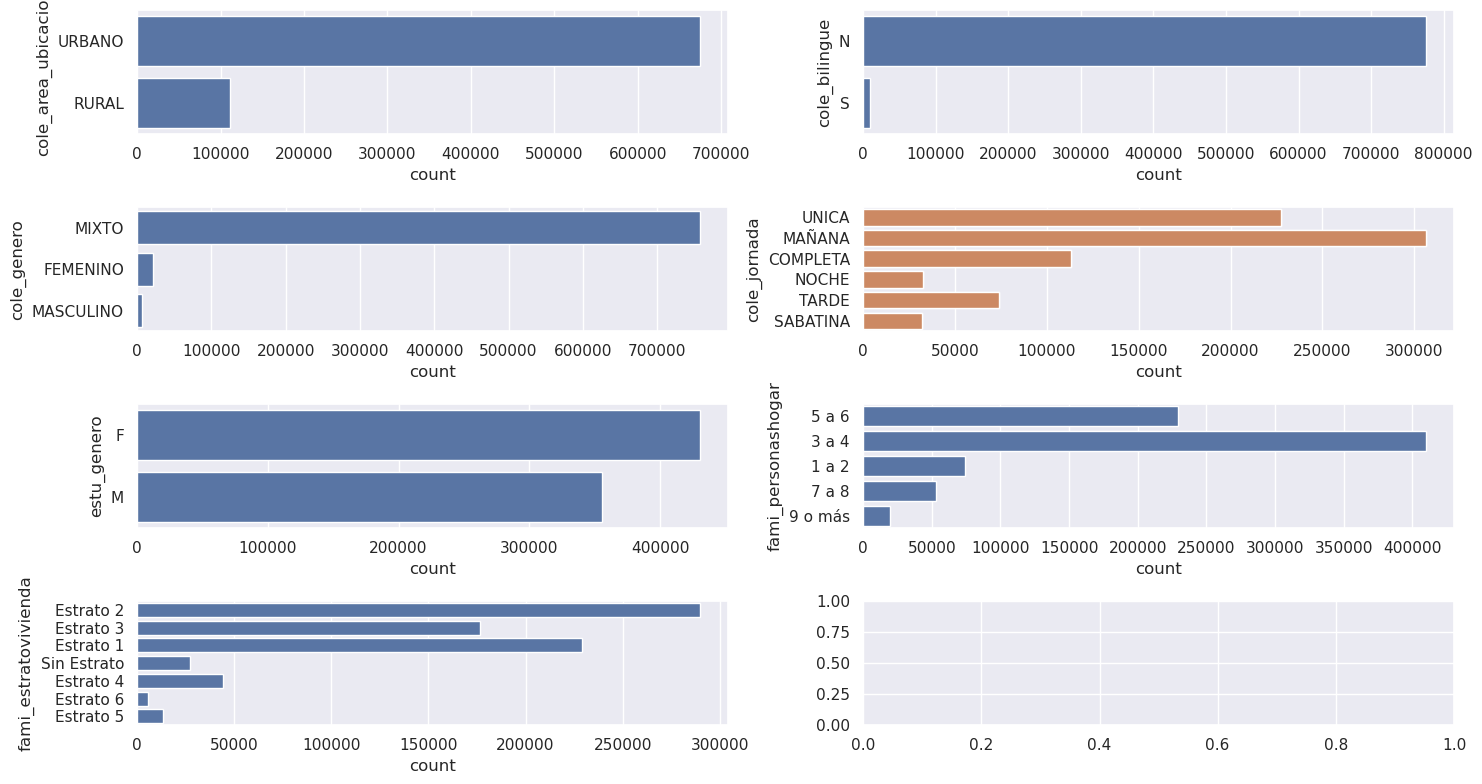

In [28]:
fig, axes = plt.subplots(4, 2, figsize=(15, 8))
sns.countplot(data=df, y='cole_jornada', ax=axes[1,1])
sns.countplot(data=df, y='cole_area_ubicacion', ax=axes[0,0]) 
sns.countplot(data=df, y='cole_bilingue', ax=axes[0,1])
sns.countplot(data=df, y='cole_genero', ax=axes[1,0])
sns.countplot(data=df, y='cole_jornada', ax=axes[1,1])
sns.countplot(data=df, y='estu_genero', ax=axes[2,0])
sns.countplot(data=df, y='fami_personashogar', ax=axes[2,1])
sns.countplot(data=df, y='fami_estratovivienda', ax=axes[3,0])
#sns.countplot(data=df, y='estu_privado_libertad', ax=axes[3,1])

plt.tight_layout()  # ajusta espacios
plt.show()

El atributo colegio genero tiene muchos datos de la categoría mixtos en comparación al Femenino y Masculino, por lo tanto, no se debe considerar en los modelos de entrenamiento.

Quitar la columna estu_privado_libertad, ya que después de quitar los registros con nulos, solo tiene un valor, "N".

In [29]:
df = df.drop(['estu_privado_libertad'], axis = 1)

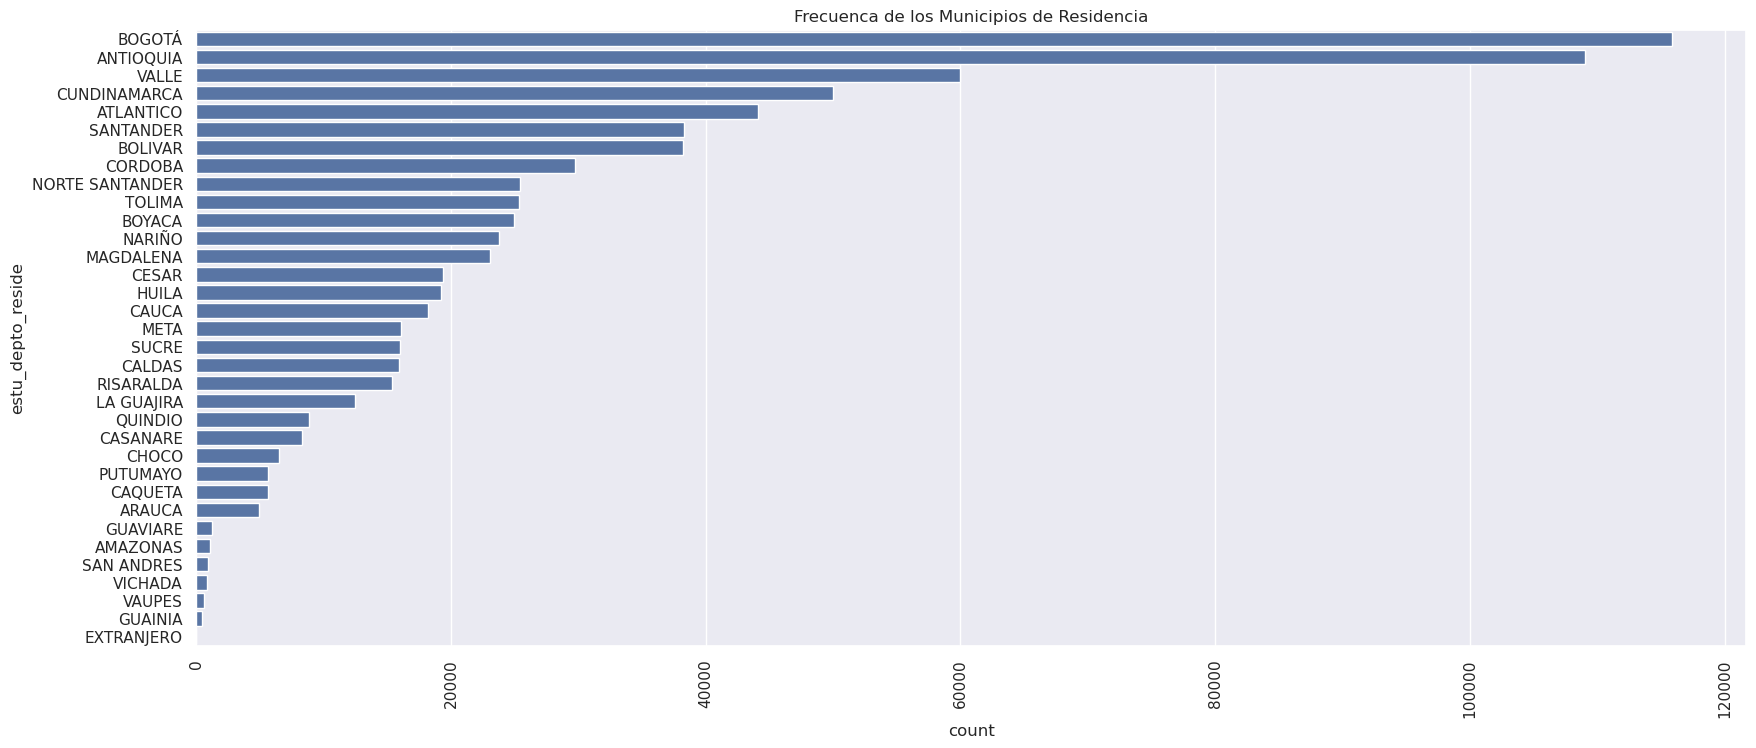

In [30]:
plt.figure(figsize = (20,8))
sns.countplot(df['estu_depto_reside'], order=df['estu_depto_reside'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Frecuenca de los Municipios de Residencia')
plt.show()

<Axes: xlabel='punt_global'>

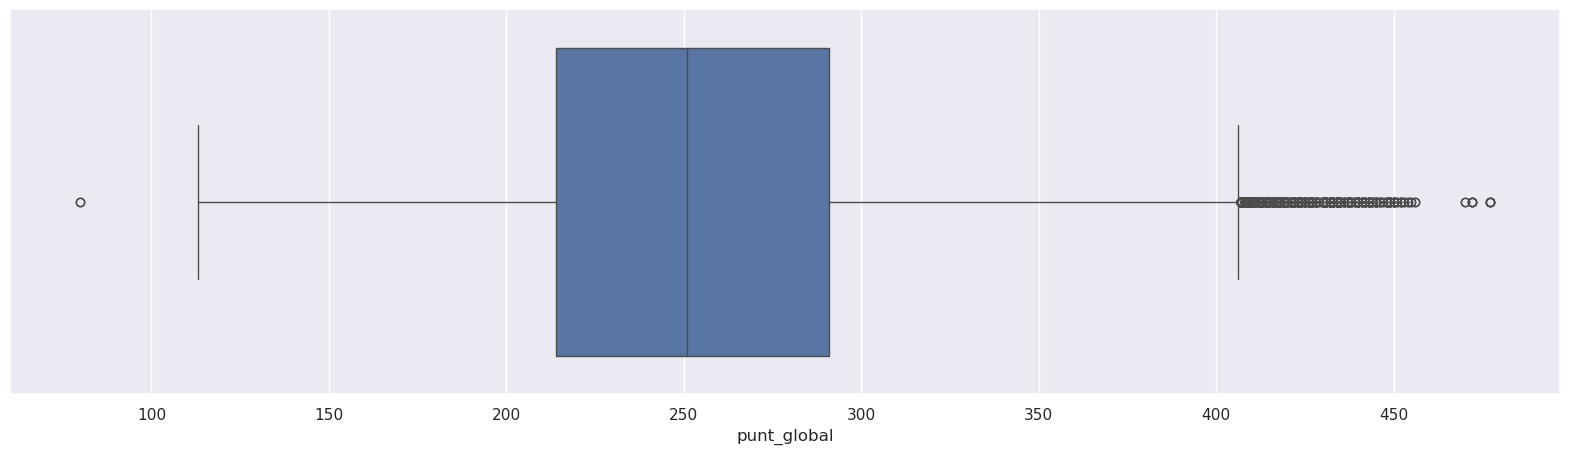

In [31]:
#Encontrando valores atípicos de la superficie total
plt.figure(figsize=(20,5))
sns.boxplot(data = df, x = "punt_global")

Quitaremos los valores atipicos del puntaje global

In [32]:
# 25th percentile and 75th percentile
q1 = df['punt_global'].quantile(q= 0.25)
q3 = df['punt_global'].quantile(q= 0.75)
# Interquartile Range
iqr = q3 - q1
# Left and Right Bounds (Min/Max)
left_bound_min = q1 - 1.5*iqr
right_bound_max = q3 + 1.5*iqr
# Printing Results
print('Minimum:', left_bound_min)
print('Maximum:', right_bound_max)
print('Q1:', q1)
print('Q3:', q3)

Minimum: 98.5
Maximum: 406.5
Q1: 214.0
Q3: 291.0


In [33]:
df.punt_global.describe()

count   785596.00
mean       253.82
std         51.39
min         80.00
25%        214.00
50%        251.00
75%        291.00
max        477.00
Name: punt_global, dtype: float64

count   784754.00
mean       253.64
std         51.12
min        113.00
25%        214.00
50%        251.00
75%        291.00
max        409.00
Name: punt_global, dtype: float64

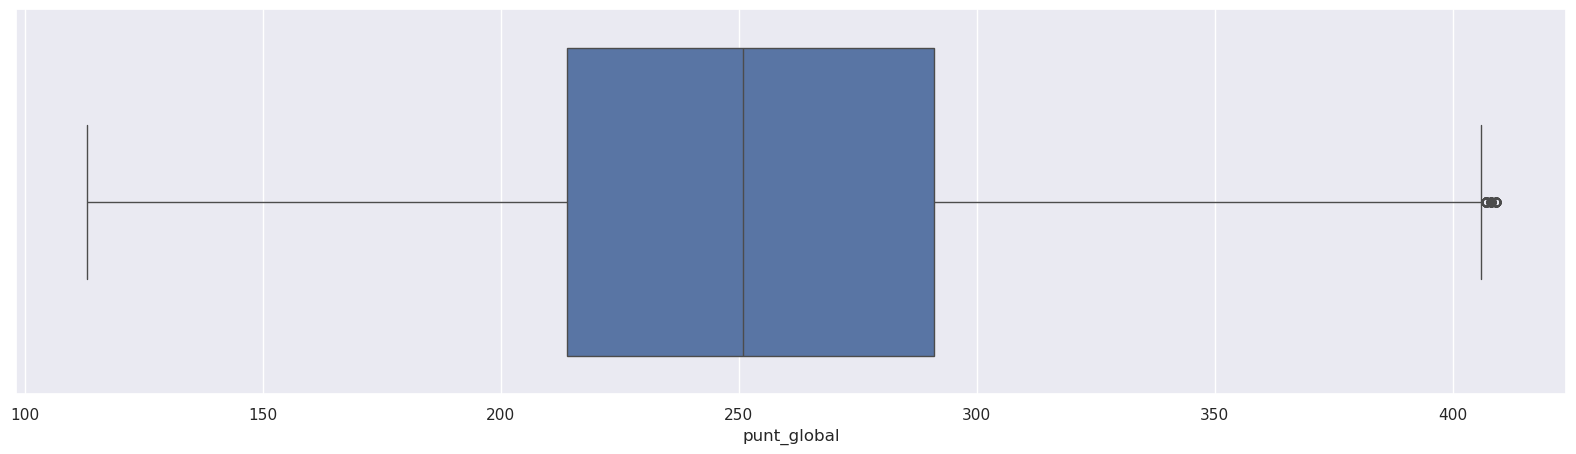

In [34]:
#Filtrando Valores atipicos del puntaje global
df_f = df.loc[(df['punt_global'] < 410) & (df['punt_global'] >100)]

#gráficamos
plt.figure(figsize=(20,5))
sns.boxplot(data = df_f, x = "punt_global")
df_f.punt_global.describe()

<Figure size 1000x400 with 0 Axes>

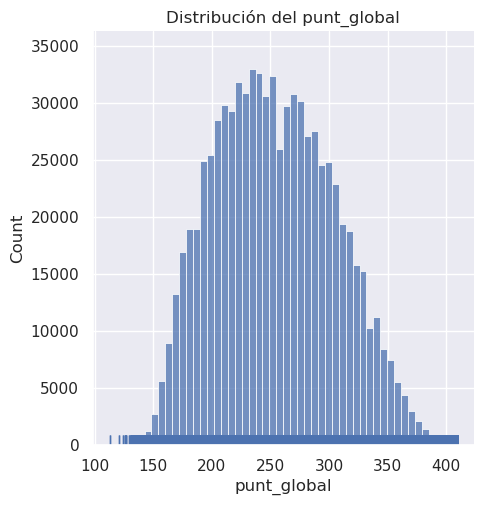

In [35]:
plt.figure(figsize=(10,4))
sns.displot(df_f['punt_global'], bins = 50, rug = True)
plt.title('Distribución del punt_global')
plt.show()

Podemos visualizar que el puntaje global tienen una distribución normal

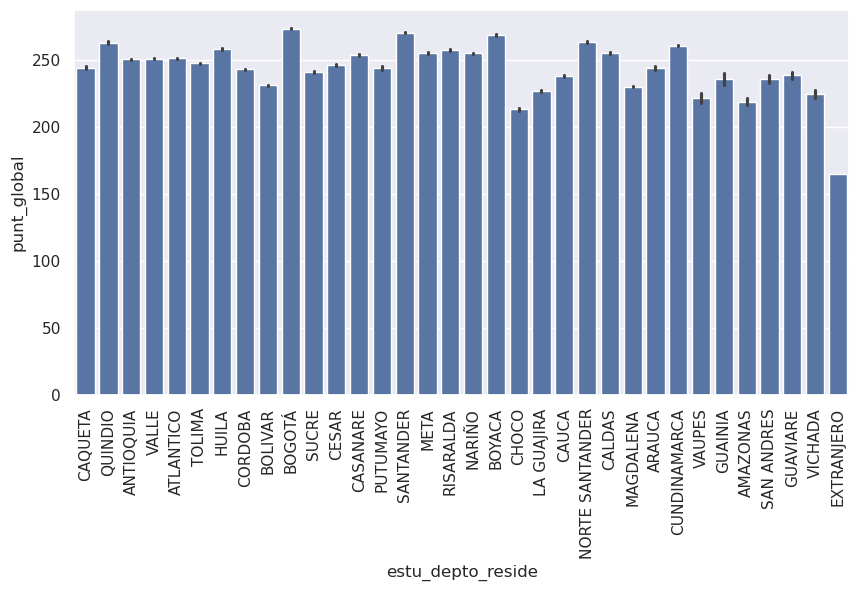

In [36]:
plt.figure(figsize =(10,5))
sns.barplot(data = df_f, x = df_f.estu_depto_reside, y= df_f['punt_global'])#palette = "viridis"
plt.xticks(rotation=90)
plt.show()

In [37]:
df_f.head()

,cole_area_ubicacion,cole_bilingue,cole_caracter,cole_genero,cole_jornada,estu_genero,estu_nacionalidad,estu_pais_reside,fami_cuartoshogar,fami_educacionmadre,fami_educacionpadre,fami_estratovivienda,fami_personashogar,fami_tieneautomovil,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,cole_depto_ubicacion,cole_mcpio_ubicacion,estu_depto_reside,estu_mcpio_reside,punt_global
0,URBANO,N,TÉCNICO/ACADÉMICO,MIXTO,UNICA,F,COLOMBIA,COLOMBIA,Cuatro,Primaria incompleta,Primaria incompleta,Estrato 2,5 a 6,No,No,No,Si,CAQUETA,EL DONCELLO,CAQUETA,EL DONCELLO,237
1,URBANO,N,TÉCNICO/ACADÉMICO,MIXTO,MAÑANA,F,COLOMBIA,COLOMBIA,Dos,Educación profesional completa,No Aplica,Estrato 2,3 a 4,No,No,Si,Si,QUINDIO,ARMENIA,QUINDIO,ARMENIA,214
3,URBANO,N,ACADÉMICO,MIXTO,COMPLETA,F,COLOMBIA,COLOMBIA,Tres,Educación profesional completa,No sabe,Estrato 3,3 a 4,Si,Si,Si,Si,ANTIOQUIA,BELLO,ANTIOQUIA,BELLO,254
4,URBANO,N,ACADÉMICO,MIXTO,MAÑANA,M,COLOMBIA,COLOMBIA,Tres,Técnica o tecnológica completa,No sabe,Estrato 2,3 a 4,No,Si,Si,Si,VALLE,PALMIRA,VALLE,CALI,341
5,URBANO,N,TÉCNICO/ACADÉMICO,MIXTO,NOCHE,F,COLOMBIA,COLOMBIA,Tres,Primaria incompleta,Primaria incompleta,Estrato 2,3 a 4,No,No,Si,No,VALLE,PALMIRA,VALLE,PALMIRA,249


In [38]:
#cole_area_ubicacion, cole_bilingue, cole_genero, cole_jornada, estu_genero, fami_personashogar, fami_estratovivienda, cole_caracter,fami_cuartoshogar, fami_educacionmadre
#fami_educacionpadre, fami_tieneautomovil, fami_tienecomputador, fami_tienelavadora, fami_tieneinternet

# estu_nacionalidad, estu_pais_reside, 
print(unique_values['fami_tienelavadora'])

['Si' 'No']


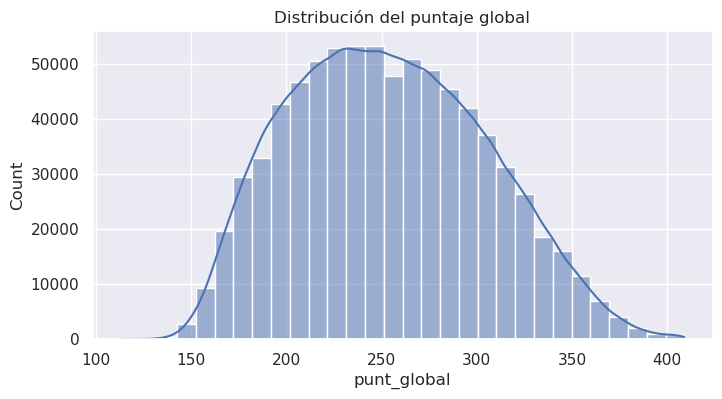

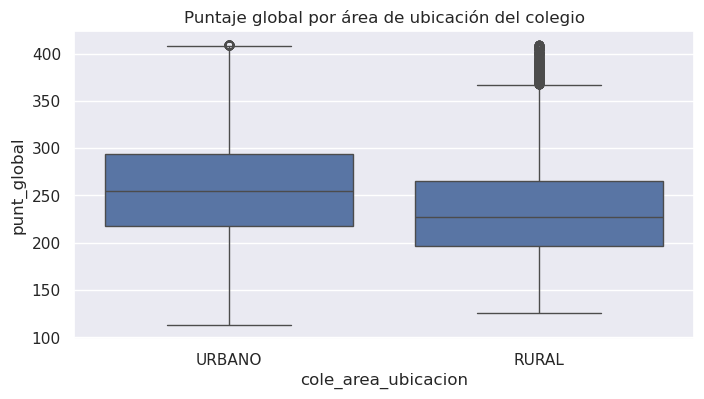

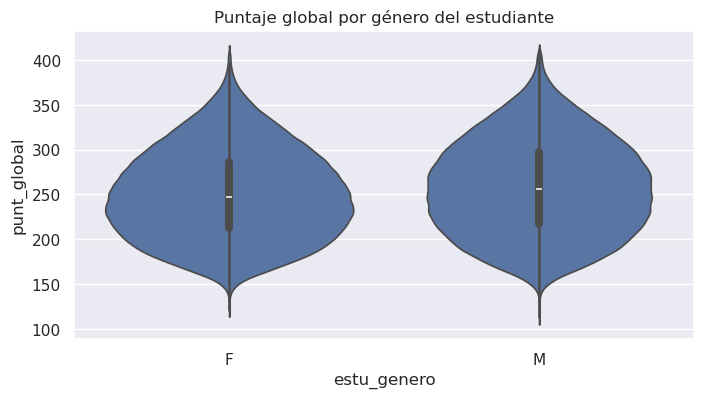

In [39]:
# Distribución del puntaje global
plt.figure(figsize=(8,4))
sns.histplot(df_f['punt_global'], kde=True, bins=30)
plt.title("Distribución del puntaje global")
plt.show()

# Boxplot del puntaje según área (rural/urbano)
plt.figure(figsize=(8,4))
sns.boxplot(data=df_f, x="cole_area_ubicacion", y="punt_global")
plt.title("Puntaje global por área de ubicación del colegio")
plt.show()

# Violinplot según género del estudiante
plt.figure(figsize=(8,4))
sns.violinplot(data=df_f, x="estu_genero", y="punt_global")
plt.title("Puntaje global por género del estudiante")
plt.show()


In [40]:
#cole_area_ubicacion, cole_bilingue, cole_genero, cole_jornada, estu_genero, fami_personashogar, fami_estratovivienda, cole_caracter,fami_cuartoshogar, fami_educacionmadre
#fami_educacionpadre, fami_tieneautomovil, fami_tienecomputador, fami_tienelavadora, fami_tieneinternet
# estu_nacionalidad, estu_pais_reside, 

# Promedio y desviación estándar por área
print(df_f.groupby("estu_genero")["punt_global"].agg(["mean", "std", "count"]).sort_values("mean", ascending=False))

print(df_f.groupby("cole_area_ubicacion")["punt_global"].agg(["mean", "std", "count"]).sort_values("mean", ascending=False))

print(df_f.groupby("cole_caracter")["punt_global"].agg(["mean", "std", "count"]).sort_values("mean", ascending=False))

print(df_f.groupby("cole_bilingue")["punt_global"].agg(["mean", "std", "count"]).sort_values("mean", ascending=False))

print(df_f.groupby("cole_jornada")["punt_global"].agg(["mean", "std", "count"]).sort_values("mean", ascending=False))

print(df_f.groupby("fami_personashogar")["punt_global"].agg(["mean", "std", "count"]).sort_values("mean", ascending=False))

print(df_f.groupby("fami_estratovivienda")["punt_global"].agg(["mean", "std", "count"]).sort_values("mean", ascending=False))

print(df_f.groupby("fami_cuartoshogar")["punt_global"].agg(["mean", "std", "count"]).sort_values("mean", ascending=False))

print(df_f.groupby("fami_tieneautomovil")["punt_global"].agg(["mean", "std", "count"]).sort_values("mean", ascending=False))

print(df_f.groupby("fami_tienecomputador")["punt_global"].agg(["mean", "std", "count"]).sort_values("mean", ascending=False))

print(df_f.groupby("fami_tienelavadora")["punt_global"].agg(["mean", "std", "count"]).sort_values("mean", ascending=False))

print(df_f.groupby("fami_tieneinternet")["punt_global"].agg(["mean", "std", "count"]).sort_values("mean", ascending=False))

# Promedio y desviación estándar por nivel educativo de la madre
print(df_f.groupby("fami_educacionmadre")["punt_global"].agg(["mean", "std", "count"]).sort_values("mean", ascending=False))

# Promedio y desviación estándar por nivel educativo de la padre
print(df_f.groupby("fami_educacionpadre")["punt_global"].agg(["mean", "std", "count"]).sort_values("mean", ascending=False))


              mean   std   count
estu_genero                     
M           257.70 52.36  354666
F           250.29 49.83  430088
                      mean   std   count
cole_area_ubicacion                     
URBANO              257.02 50.96  673672
RURAL               233.15 47.11  111082
                    mean   std   count
cole_caracter                         
ACADÉMICO         257.48 52.75  393980
TÉCNICO/ACADÉMICO 251.11 48.96  294792
TÉCNICO           245.69 49.30   94880
NO APLICA         238.03 50.83    1102
                mean   std   count
cole_bilingue                     
N             253.70 51.02  774710
S             248.93 58.08   10044
               mean   std   count
cole_jornada                     
COMPLETA     284.75 52.03  112606
UNICA        254.23 47.65  227326
MAÑANA       251.52 49.55  306134
TARDE        248.15 47.34   73782
SABATINA     214.28 38.31   32126
NOCHE        213.33 38.96   32780
                     mean   std   count
fami_personashogar

Esta son algunos atributos que a criterio del analista pueden ser importantes, como el estrato, que puede influir en el promedio del puntaje. Lo que me sorprendió fue la educación de la madre y el padre, entre mejor educación, mejor puntaje para los hijos. Hay que coger con pinzas los promedios de cada atributo, ya que la cantidad de personas en cada categoría no es proporcional. Por lo tanto, no se puede sacar congeturas a la ligera.

Los atributos se pueden dividir en información del Colegio, información del estudiante e información de la familia del estudiante.

Una información redundante, puede ser la ubicación del colegio y la ubicación donde reside el estudiante.

In [41]:
print(df_f['punt_global'].describe())
print("Varianza:", df_f['punt_global'].var())


count   784754.00
mean       253.64
std         51.12
min        113.00
25%        214.00
50%        251.00
75%        291.00
max        409.00
Name: punt_global, dtype: float64
Varianza: 2613.1019670653995


In [42]:
cat_cols = [
    "cole_area_ubicacion", "cole_bilingue", "cole_caracter", "cole_genero",
    "cole_jornada", "estu_genero", "estu_nacionalidad", "estu_pais_reside",
    "fami_cuartoshogar", "fami_educacionmadre", "fami_educacionpadre",
    "fami_estratovivienda", "fami_personashogar", "fami_tieneautomovil",
    "fami_tienecomputador", "fami_tieneinternet", "fami_tienelavadora",
    "cole_depto_ubicacion", "cole_mcpio_ubicacion",
    "estu_depto_reside", "estu_mcpio_reside"
]

for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(normalize=True).head(10))  # top 10 valores + proporción



--- cole_area_ubicacion ---
cole_area_ubicacion
URBANO   0.86
RURAL    0.14
Name: proportion, dtype: float64

--- cole_bilingue ---
cole_bilingue
N   0.99
S   0.01
Name: proportion, dtype: float64

--- cole_caracter ---
cole_caracter
ACADÉMICO           0.50
TÉCNICO/ACADÉMICO   0.38
TÉCNICO             0.12
NO APLICA           0.00
Name: proportion, dtype: float64

--- cole_genero ---
cole_genero
MIXTO       0.96
FEMENINO    0.03
MASCULINO   0.01
Name: proportion, dtype: float64

--- cole_jornada ---
cole_jornada
MAÑANA     0.39
UNICA      0.29
COMPLETA   0.14
TARDE      0.09
NOCHE      0.04
SABATINA   0.04
Name: proportion, dtype: float64

--- estu_genero ---
estu_genero
F   0.55
M   0.45
Name: proportion, dtype: float64

--- estu_nacionalidad ---
estu_nacionalidad
COLOMBIA         0.99
VENEZUELA        0.01
ECUADOR          0.00
ESPAÑA           0.00
ESTADOS UNIDOS   0.00
PERÚ             0.00
VANUATU          0.00
PANAMÁ           0.00
ITALIA           0.00
CUBA             0.00
Na

Con estos resultados podemos filtrar los atributos que pueden explicar el desempeño en las pruebas icfes: estu_genero,  cole_jornada, fami_personashogar, fami_estratovivienda, fami_cuartoshogar, fami_tieneautomovil, fami_tienecomputador, fami_tieneinternet, fami_educacionmadre, fami_educacionpadre.

Los atributos restantes considerados, tiene una proporción de datos desigual que puede alterar el resultado

In [43]:
dt = df_f.drop(['cole_area_ubicacion','cole_bilingue','cole_genero', 'estu_nacionalidad', 'estu_pais_reside',
                'cole_depto_ubicacion', 'cole_mcpio_ubicacion', 'estu_depto_reside', 'estu_mcpio_reside'], axis = 1)

In [44]:
dt.head()

,cole_caracter,cole_jornada,estu_genero,fami_cuartoshogar,fami_educacionmadre,fami_educacionpadre,fami_estratovivienda,fami_personashogar,fami_tieneautomovil,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,punt_global
0,TÉCNICO/ACADÉMICO,UNICA,F,Cuatro,Primaria incompleta,Primaria incompleta,Estrato 2,5 a 6,No,No,No,Si,237
1,TÉCNICO/ACADÉMICO,MAÑANA,F,Dos,Educación profesional completa,No Aplica,Estrato 2,3 a 4,No,No,Si,Si,214
3,ACADÉMICO,COMPLETA,F,Tres,Educación profesional completa,No sabe,Estrato 3,3 a 4,Si,Si,Si,Si,254
4,ACADÉMICO,MAÑANA,M,Tres,Técnica o tecnológica completa,No sabe,Estrato 2,3 a 4,No,Si,Si,Si,341
5,TÉCNICO/ACADÉMICO,NOCHE,F,Tres,Primaria incompleta,Primaria incompleta,Estrato 2,3 a 4,No,No,Si,No,249


### Encoding

In [45]:
print(unique_values['fami_personashogar'])

['5 a 6' '3 a 4' '1 a 2' '7 a 8' '9 o más']


In [46]:
dt_est_gen = pd.get_dummies(dt['estu_genero'], drop_first=True, prefix="estu_genero").astype(int)
#dt_col_car = pd.get_dummies(dt['cole_caracter'], drop_first=False, prefix="cole_caracter").astype(int)
dt_auto = pd.get_dummies(dt['fami_tieneautomovil'], drop_first=True, prefix="fami_tieneautomovil").astype(int)
dt_compu = pd.get_dummies(dt['fami_tienecomputador'], drop_first=True, prefix="fami_tienecomputador").astype(int)
dt_inter = pd.get_dummies(dt['fami_tieneinternet'], drop_first=True, prefix="fami_tieneinternet").astype(int)
dt_lav = pd.get_dummies(dt['fami_tienelavadora'], drop_first=True, prefix="fami_tienelavadora").astype(int)

In [47]:
dt['cole_caracter'] = dt['cole_caracter'].astype('category')
dt['cole_caracter_enc'] = dt['cole_caracter'].cat.codes

dt['cole_jornada'] = dt['cole_jornada'].astype('category')
dt['cole_jornada_enc'] = dt['cole_jornada'].cat.codes

dt['fami_educacionmadre'] = dt['fami_educacionmadre'].astype('category')
dt['fami_educacionmadre_enc'] = dt['fami_educacionmadre'].cat.codes

dt['fami_educacionpadre'] = dt['fami_educacionpadre'].astype('category')
dt['fami_educacionpadre_enc'] = dt['fami_educacionpadre'].cat.codes

In [48]:
mapeo = {
    "Estrato 1": 1,
    "Estrato 2": 2,
    "Estrato 3": 3,
    "Estrato 4": 4,
    "Estrato 5": 5,
    "Estrato 6": 6,
    "Sin Estrato": 0   
}

dt["fami_estratovivienda"] = dt["fami_estratovivienda"].replace(mapeo)

cuartos = {
    "Uno": 1,
    "Dos": 2,
    "Tres": 3,
    "Cuatro": 4,
    "Cinco": 5,
    "Seis o mas": 6  
}

dt["fami_cuartoshogar"] = dt["fami_cuartoshogar"].replace(cuartos)

person = {
    "1 a 2": 0,
    "3 a 4": 1,
    "5 a 6": 2,
    "7 a 8": 3,
    "9 o más": 4  
}

dt["fami_personashogar"] = dt["fami_personashogar"].replace(person)

/tmp/ipykernel_1842/4025794898.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt["fami_estratovivienda"] = dt["fami_estratovivienda"].replace(mapeo)
/tmp/ipykernel_1842/4025794898.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt["fami_cuartoshogar"] = dt["fami_cuartoshogar"].replace(cuartos)
/tmp/ipykernel_1842/4025794898.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-i

In [49]:
#print(dt_est_gen.head())# 0 es femenino, 1 es masculino
#print(dt_auto.head())# 0 es No, 1 es Sí - fami_tieneautomovil
#print(dt_compu.head()) # 0 es No, 1 es Sí - fami_tienecomputador
#print(dt_inter.head()) # 0 es No, 1 es Sí - fami_tieneinternet
#print(dt_lav.head()) # 0 es No, 1 es Sí - fami_tienelavadora

#print(dt_col_car.head())
dt.head(20)

,cole_caracter,cole_jornada,estu_genero,fami_cuartoshogar,fami_educacionmadre,fami_educacionpadre,fami_estratovivienda,fami_personashogar,fami_tieneautomovil,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,punt_global,cole_caracter_enc,cole_jornada_enc,fami_educacionmadre_enc,fami_educacionpadre_enc
0,TÉCNICO/ACADÉMICO,UNICA,F,4,Primaria incompleta,Primaria incompleta,2,2,No,No,No,Si,237,3,5,7,7
1,TÉCNICO/ACADÉMICO,MAÑANA,F,2,Educación profesional completa,No Aplica,2,1,No,No,Si,Si,214,3,1,0,3
3,ACADÉMICO,COMPLETA,F,3,Educación profesional completa,No sabe,3,1,Si,Si,Si,Si,254,0,0,0,4
4,ACADÉMICO,MAÑANA,M,3,Técnica o tecnológica completa,No sabe,2,1,No,Si,Si,Si,341,0,1,10,4
5,TÉCNICO/ACADÉMICO,NOCHE,F,3,Primaria incompleta,Primaria incompleta,2,1,No,No,Si,No,249,3,2,7,7
6,ACADÉMICO,MAÑANA,F,3,No sabe,No sabe,3,2,No,Si,Si,Si,220,0,1,4,4
7,ACADÉMICO,MAÑANA,M,2,Educación profesional incompleta,Secundaria (Bachillerato) incompleta,2,0,No,No,Si,Si,285,0,1,1,9
8,ACADÉMICO,UNICA,F,4,Secundaria (Bachillerato) incompleta,Primaria incompleta,2,1,Si,No,Si,Si,189,0,5,9,7
9,TÉCNICO,TARDE,F,1,Ninguno,Ninguno,1,0,No,No,Si,Si,226,2,4,2,2
10,ACADÉMICO,COMPLETA,F,3,Educación profesional completa,Técnica o tecnológica completa,2,0,Si,Si,Si,Si,264,0,0,0,10


In [50]:
#print(dt_est_gen.head())# 0 es femenino, 1 es masculino
#print(dt_auto.head())# 0 es No, 1 es Sí - fami_tieneautomovil
#print(dt_compu.head()) # 0 es No, 1 es Sí - fami_tienecomputador
#print(dt_inter.head()) # 0 es No, 1 es Sí - fami_tieneinternet
#print(dt_lav.head()) # 0 es No, 1 es Sí - fami_tienelavadora
dd = dt.drop(['estu_genero', 'fami_tieneautomovil', 'fami_tienecomputador', 'fami_tieneinternet', 'fami_tienelavadora', 
              'cole_caracter','cole_jornada','fami_educacionmadre','fami_educacionpadre'], axis = 1)
dd = pd.concat([dd, dt_est_gen, dt_auto, dt_compu, dt_inter, dt_lav], axis=1)
#dd = pd.concat([dd, dt_est_gen, dt_auto, dt_compu, dt_inter, dt_lav, dt_col_car], axis=1)
dd.head()

,fami_cuartoshogar,fami_estratovivienda,fami_personashogar,punt_global,cole_caracter_enc,cole_jornada_enc,fami_educacionmadre_enc,fami_educacionpadre_enc,estu_genero_M,fami_tieneautomovil_Si,fami_tienecomputador_Si,fami_tieneinternet_Si,fami_tienelavadora_Si
0,4,2,2,237,3,5,7,7,0,0,0,0,1
1,2,2,1,214,3,1,0,3,0,0,0,1,1
3,3,3,1,254,0,0,0,4,0,1,1,1,1
4,3,2,1,341,0,1,10,4,1,0,1,1,1
5,3,2,1,249,3,2,7,7,0,0,0,1,0


In [51]:
#pp = dd.drop(['cole_jornada','fami_cuartoshogar','fami_educacionmadre','fami_educacionpadre', 'fami_estratovivienda', 'fami_personashogar'], axis = 1)

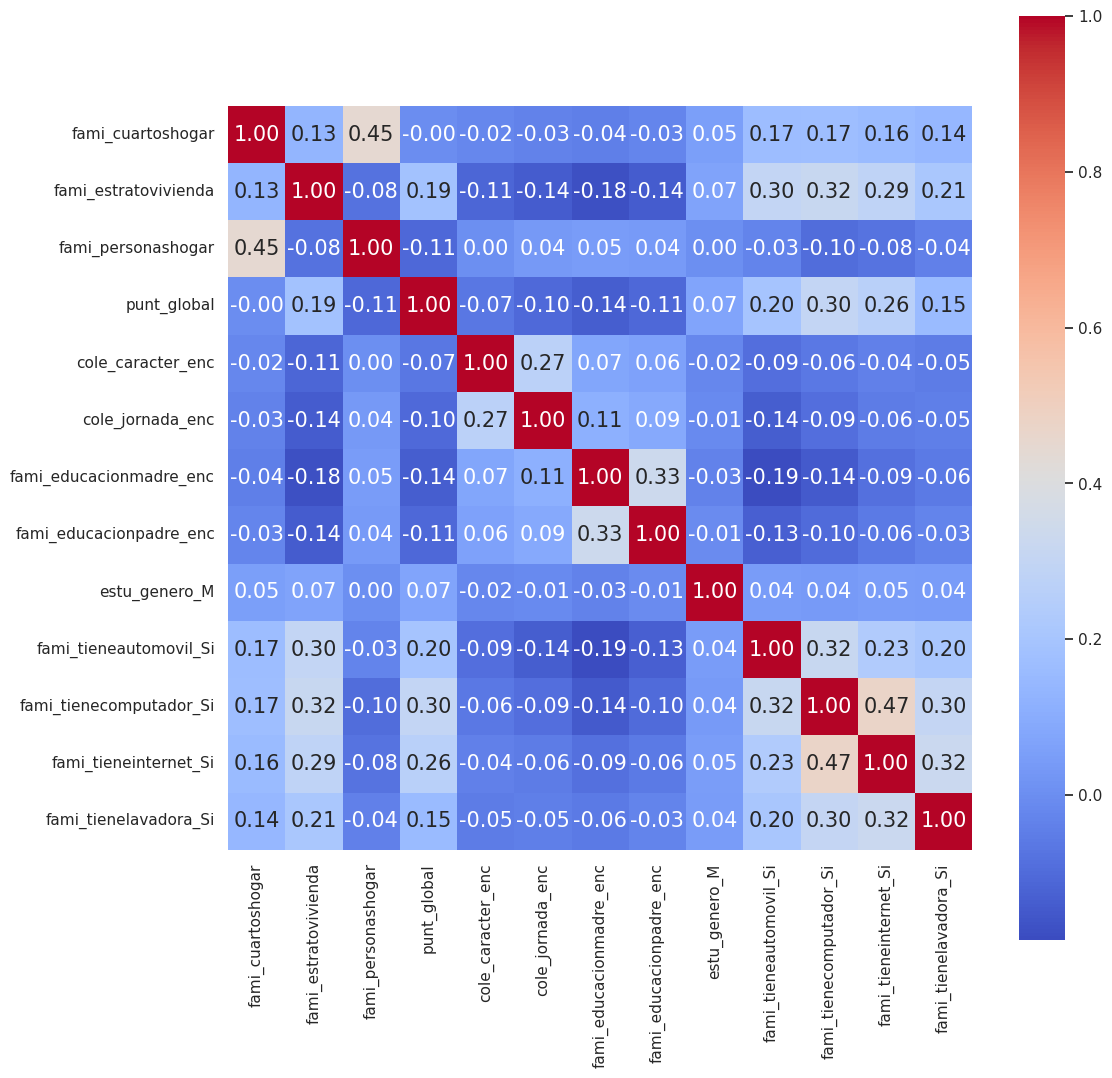

In [52]:
#Correlaciones
corr = dd.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
            
           cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

No hay una relación fuerte entre el puntaje global y la información sociodemografica del dataset resultante. Por lo tanto, el modelo que se entrene con los datos puede que no sea muy confiable. Habría que buscar más datos que complementen el comportamiento del puntaje global. 

hay una relación moderada entre las familias que tienen internet y las familias que tienen computador, tiene sentido que esos dos aaspectos tenga relación.

Haría un analisis mas profundo a las variables estrato, familia con automóvil, familia con computador, familia con internet y familia con lavadora, ya que tienen una correlación positiva y son aspectos que una familia puede hacer para mejorar el redimientos de sus hijos en una prueba como la del Icfes

## Fase 3

En esta fase propondrás, implementarás y reportarás el desempeño de uno o más modelos (al menos uno predictivo) que busquen explicar las relaciones entre factores sociodemográficos y el desempeño en la prueba. Además, concluirás con respecto a la validez de al menos un modelo y los posibles hallazgos que se podrían reportar para el stakeholder.

Pautas generales:

* Seleccionar variables y proponer modelos acordes a estas y al contexto del problema.
* Utilizar librerías especializadas (ej., `statsmodels`, `sklearn`, etc.) para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Los módulos correspondientes a regresión lineal y regresión logística pueden ser útiles.
* Asegurar el cumplimiento de los supuestos y buenas prácticas de cada modelo.
* Utilizar las métricas de evaluación de desempeño (disponibles en las librerías especilizadas), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:

* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?

In [53]:
from sklearn.metrics import r2_score

In [54]:
X = dd.drop('punt_global', axis=1)
y = dd['punt_global']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)#, random_state=42)
from sklearn.linear_model import LinearRegression
linear_model1 = LinearRegression()

In [56]:
linear_model1.fit(X_train, y_train)
y_test_pred1_LiA = linear_model1.predict(X_test)# Predicción datos de testeo
y_train_pred1_LiB = linear_model1.predict(X_train)
print(linear_model1.coef_, linear_model1.intercept_)

[-3.59340028  1.98251793 -2.44893432 -0.60989898 -1.2324818  -0.83602588
 -0.76263505  5.23435333  8.70808224 18.49544954 15.56426838  3.75196535] 247.99124859448986


In [57]:
print('Linear')
print('R2 para Testeo:', r2_score(y_test,y_test_pred1_LiA))
print('R2 para Train:', r2_score(y_train,y_train_pred1_LiB))

Linear
R2 para Testeo: 0.14210503437284872
R2 para Train: 0.14292924551347053


In [58]:
yhat = linear_model1.predict(X)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print('R Cuadrado:',r_squared, 'R cuadrado ajustado:',adjusted_r_squared)

R Cuadrado: 0.14268344409051437 R cuadrado ajustado: 0.14267033428910092


In [59]:
from sklearn.metrics import mean_squared_error
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred1_LiA))
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred1_LiB))
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')



Raíz del error cuadrático medio en Test: 47.35847682223325
Raíz del error cuadrático medio en Train: 47.31965949186577


In [60]:
dd.columns

Index(['fami_cuartoshogar', 'fami_estratovivienda', 'fami_personashogar',
       'punt_global', 'cole_caracter_enc', 'cole_jornada_enc',
       'fami_educacionmadre_enc', 'fami_educacionpadre_enc', 'estu_genero_M',
       'fami_tieneautomovil_Si', 'fami_tienecomputador_Si',
       'fami_tieneinternet_Si', 'fami_tienelavadora_Si'],
      dtype='object')

Haría un analisis mas profundo a las variables estrato, familia con automóvil, familia con computador, familia con internet y familia con lavadora, ya que tienen una correlación positiva y son aspectos que una familia puede hacer para mejorar el redimientos de sus hijos en una prueba como la del Icfes

#### Subconjunto

In [61]:
dpp = dd.drop(['fami_cuartoshogar','fami_personashogar','cole_caracter_enc','cole_jornada_enc'
               ,'fami_educacionmadre_enc', 'fami_educacionpadre_enc', 'estu_genero_M'], axis = 1)

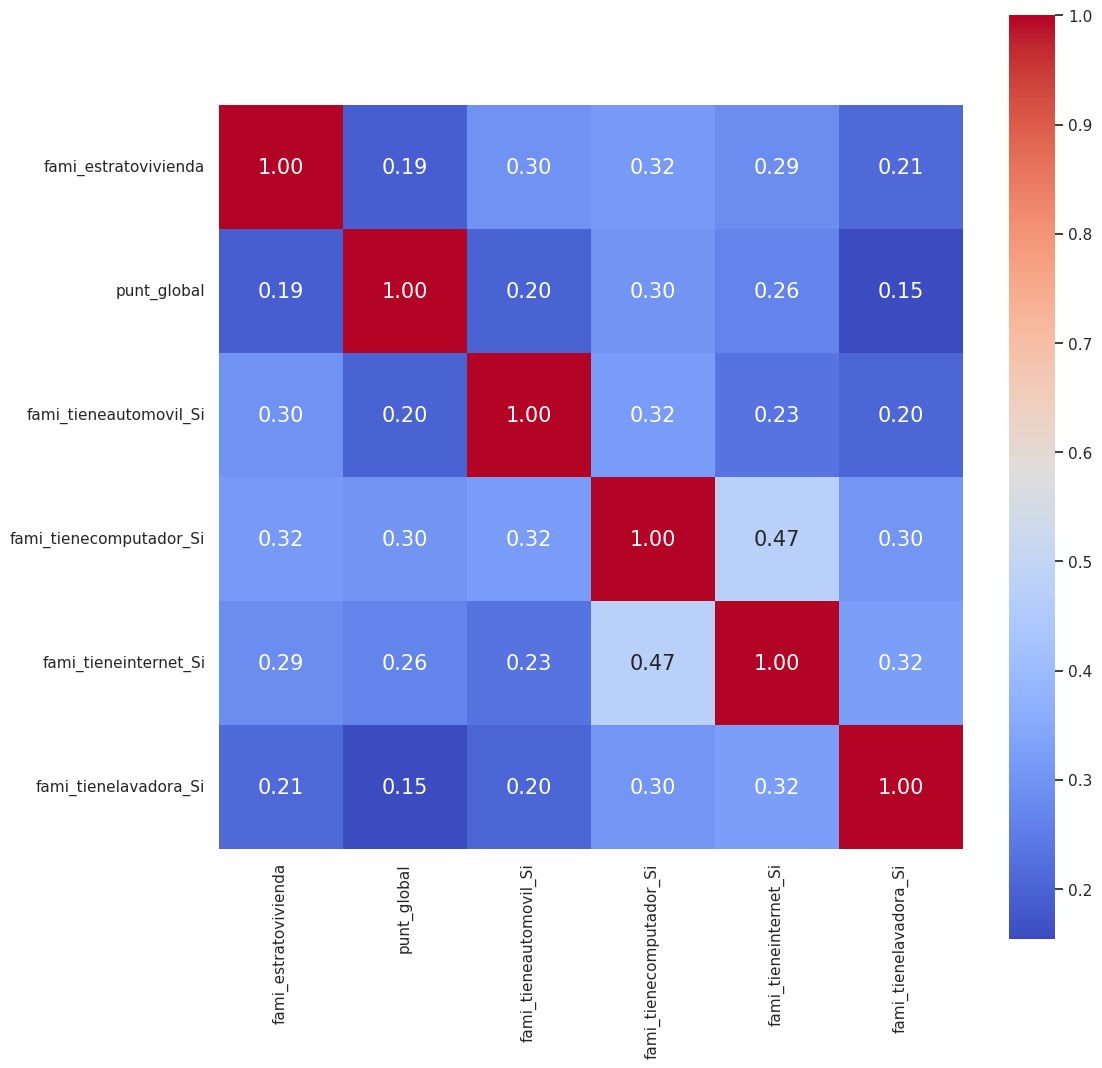

In [62]:
corr = dpp.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
            
           cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

In [63]:
X2 = dd.drop('punt_global', axis=1)
y2 = dd['punt_global']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.30)#, random_state=42)
from sklearn.linear_model import LinearRegression
linear_model2 = LinearRegression()

In [65]:
linear_model2.fit(X_train, y_train)
y_test_pred2_LiA = linear_model2.predict(X_test)# Predicción datos de testeo
y_train_pred2_LiB = linear_model2.predict(X_train)
print(linear_model2.coef_, linear_model2.intercept_)

[-3.55195902  2.04192377 -2.37890309 -0.65871889 -1.2298962  -0.83782329
 -0.7783266   5.32345848  8.78777216 18.4316608  15.32301225  3.84771931] 247.8962066988002


In [66]:
print('Linear')
print('R2 para Testeo:', r2_score(y_test,y_test_pred2_LiA))
print('R2 para Train:', r2_score(y_train,y_train_pred2_LiB))

Linear
R2 para Testeo: 0.1424246670177587
R2 para Train: 0.14279482001813482


In [67]:
from sklearn.metrics import mean_squared_error
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred2_LiA))
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred2_LiB))
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')

Raíz del error cuadrático medio en Test: 47.362063240330805
Raíz del error cuadrático medio en Train: 47.31807154237953


Con un R cuadrado del 0.14, quiere decir que solo el 14% de la variación en los puntajes globales está siendo explicada por el modelo. Es decir, que el 86% restante se debe a factores que el modelo no captura.
Un punto a revisar es la forma de imputar los valores nulos, otro ejercicio es filtrar solo por una zona geografica como Bogota o Antioquia.

Además, el R cuadrado no mejora aún dejando los atributos que tienen mejor correlación con el puntaje global

In [68]:
dd.shape, dpp.shape

((784754, 13), (784754, 6))

## Fase 4

*Alternativa 1: desarrollar una herramienta interactiva de análisis*
Pautas generales:

* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar el/los parámetro(s) que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar una librería especializada (ej., `ipywidgets`, `panel`, etc.) para implementar la herramienta.

*Alternativa 2: registrar en bases de datos relacionales con PySpark*

In [69]:
import ipywidgets as widgets
from ipywidgets import interactive

In [70]:
dt.columns

Index(['cole_caracter', 'cole_jornada', 'estu_genero', 'fami_cuartoshogar',
       'fami_educacionmadre', 'fami_educacionpadre', 'fami_estratovivienda',
       'fami_personashogar', 'fami_tieneautomovil', 'fami_tienecomputador',
       'fami_tieneinternet', 'fami_tienelavadora', 'punt_global',
       'cole_caracter_enc', 'cole_jornada_enc', 'fami_educacionmadre_enc',
       'fami_educacionpadre_enc'],
      dtype='object')

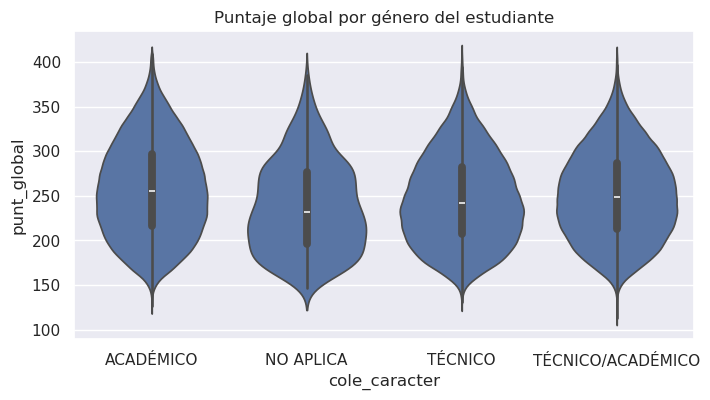

In [71]:
#variables, base de datos, x son las columnas y y
# Violinplot según género del estudiante
plt.figure(figsize=(8,4))
sns.violinplot(data=dt, x="cole_caracter", y="punt_global")
plt.title("Puntaje global por género del estudiante")
plt.show()

### Instrucciones
A continuación, se dispone de dos gráficas en las cuales podrás elegir que atributos quieres visualizar del dataframe final y en la segunda gráfica podrás elegir que atributos quieres visulizar su distribución y de que dataframe. Esto facilita la comprensión de los datos generales.

In [72]:
import ipywidgets as widgets
from IPython.display import display

In [73]:
# Dropdown para seleccionar variables
x_dropdown = widgets.Dropdown(
    options=dt.columns,
    description="X:",
    value="cole_caracter"   # valor por defecto
)

y_dropdown = widgets.Dropdown(
    options=dt.columns,
    description="Y:",
    value="punt_global"     # valor por defecto
)

output = widgets.Output()

def actualizar_grafica(change=None):
    output.clear_output()
    with output:
        plt.figure(figsize=(10,6))
        try:
            sns.violinplot(data=dt, x=x_dropdown.value, y=y_dropdown.value)
            plt.title(f"Violinplot: {y_dropdown.value} por {x_dropdown.value}")
            plt.xticks(rotation=45, ha="right")
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error al graficar: {e}")

# Vincular cambios
x_dropdown.observe(actualizar_grafica, names="value")
y_dropdown.observe(actualizar_grafica, names="value")

# Mostrar interfaz
display(x_dropdown, y_dropdown, output)

# Mostrar primera gráfica
actualizar_grafica()


Dropdown(description='X:', options=('cole_caracter', 'cole_jornada', 'estu_genero', 'fami_cuartoshogar', 'fami…

Dropdown(description='Y:', index=12, options=('cole_caracter', 'cole_jornada', 'estu_genero', 'fami_cuartoshog…

Output()

In [74]:
# Lista de DataFrames disponibles
dataframes = {"data": data, "df": df, "dd": dd, "dt": dt}

# Dropdown para escoger el DataFrame
df_dropdown = widgets.Dropdown(
    options=list(dataframes.keys()),
    description="DataFrame:",
    value="dt"   # por defecto
)

# Dropdowns para X e Y (se inicializan vacíos)
x_dropdown = widgets.Dropdown(description="X:")
y_dropdown = widgets.Dropdown(description="Y:")

output = widgets.Output()

# Función para actualizar las columnas cuando cambie el DataFrame
def actualizar_columnas(change=None):
    df = dataframes[df_dropdown.value]
    columnas = df.columns.tolist()
    x_dropdown.options = columnas
    y_dropdown.options = columnas
    # valores por defecto
    if "cole_caracter" in columnas:
        x_dropdown.value = "cole_caracter"
    else:
        x_dropdown.value = columnas[0]
    if "punt_global" in columnas:
        y_dropdown.value = "punt_global"
    else:
        y_dropdown.value = columnas[0]

# Función para graficar
def actualizar_grafica(change=None):
    output.clear_output()
    df = dataframes[df_dropdown.value]
    with output:
        plt.figure(figsize=(10,6))
        try:
            sns.violinplot(data=df, x=x_dropdown.value, y=y_dropdown.value)
            plt.title(f"Violinplot: {y_dropdown.value} por {x_dropdown.value} en {df_dropdown.value}")
            plt.xticks(rotation=45, ha="right")
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error al graficar: {e}")

# Conectar eventos
df_dropdown.observe(actualizar_columnas, names="value")
x_dropdown.observe(actualizar_grafica, names="value")
y_dropdown.observe(actualizar_grafica, names="value")

# Mostrar interfaz
display(df_dropdown, x_dropdown, y_dropdown, output)

# Inicializar
actualizar_columnas()
actualizar_grafica()


Dropdown(description='DataFrame:', index=3, options=('data', 'df', 'dd', 'dt'), value='dt')

Dropdown(description='X:', options=(), value=None)

Dropdown(description='Y:', options=(), value=None)

Output()